# Visualização de dados com Seaborn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Bibliotecas básicas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Carregando os dados

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
dados.shape

(244, 6)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


### Dicionário dos dados

1. **total_bill**: total da conta
2. **tip**: gorgeta
3. **dessert**: pediu sobremesa ou não
4. **day**: dia da semana
5. **time**: hora do almoço ou jantar
6. **size**: total de pessoas na mesa




### Traduzindo colunas e campos

In [6]:
dados = dados.rename(columns={'total_bill': 'valor_da_conta', 
                      'tip': 'gorgeta', 
                      'dessert': 'sobremesa', 
                      'day': 'dia_da_semana', 
                      'time': 'hora_do_dia', 
                      'size': 'total_de_pessoas'})
dados.head(2)

,valor_da_conta,gorgeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3


In [7]:
dados['sobremesa'] = dados['sobremesa'].map({'No': 'Não', 'Yes': 'Sim'})
dados['dia_da_semana'] = dados['dia_da_semana'].map({'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta', 'Fri': 'Sexta'})
dados['hora_do_dia'] = dados['hora_do_dia'].map({'Dinner': 'Jantar', 'Lunch': 'Almoço'})
dados.head(2)

,valor_da_conta,gorgeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3


### Visualização dos dados

In [8]:
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, pandas, matplotlib, numpy
Required-by: missingno


#### O valor da conta influencia na gorgeta?

Visualmente, o valor da gorgeta aumenta conforme aumenta o valor da conta.

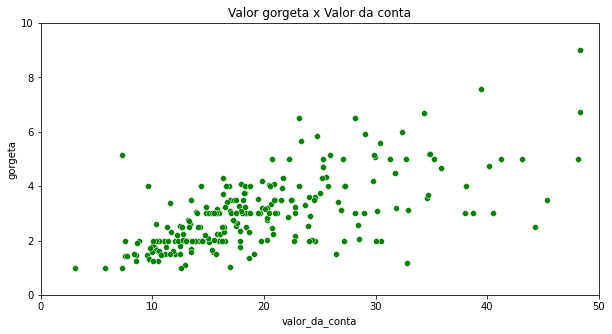

In [9]:
plt.figure(figsize=[10, 5])
sns.scatterplot(x='valor_da_conta', y='gorgeta', data=dados, color='green')
plt.title('Valor gorgeta x Valor da conta')
plt.xlim(0, 50)
plt.ylim(0, 10)
plt.show()

### O valor da conta é proporcional ao valor da gorgeta?

Visualmente, o valor da conta não é proporcional ao valor da gorgeta.

In [10]:
dados['porcentagem'] = round(dados['gorgeta'] / dados['valor_da_conta'], 2)
dados.head(2)

,valor_da_conta,gorgeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16


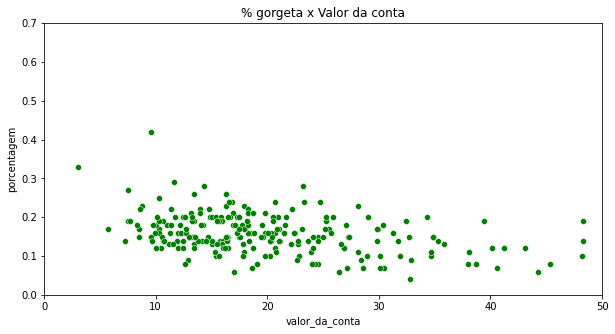

In [12]:
plt.figure(figsize=[10, 5])
sns.scatterplot(x='valor_da_conta', y='porcentagem', data=dados, color='green')
plt.title('% gorgeta x Valor da conta')
plt.xlim(0, 50)
plt.ylim(0, 0.7)
plt.show()

### Relplot e Lmplot

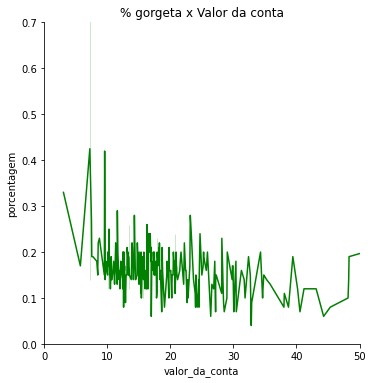

In [18]:
sns.relplot(x='valor_da_conta', y='porcentagem', data=dados, color='green', kind='line')
plt.title('% gorgeta x Valor da conta')
plt.xlim(0, 50)
plt.ylim(0, 0.7)
plt.show()

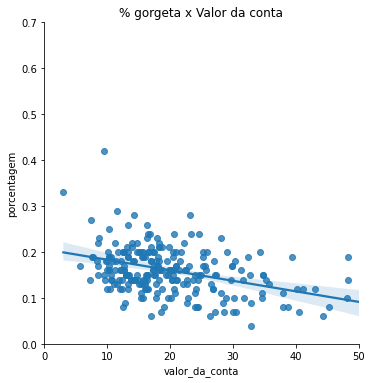

In [21]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=dados)
plt.title('% gorgeta x Valor da conta')
plt.xlim(0, 50)
plt.ylim(0, 0.7)
plt.show()